----------------------------
# **Creación del Modelo y Evalución**
------------------------ 

-------------------
------------------
## **1.** **Importar Librerias**
-------------------
------------------

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2

-------------------
------------------
## **2.** **Cargar Datos Procesados**
-------------------
------------------

In [2]:
# Load Processed Data
movies_path = '../Data/Processed/processed_movies.csv'
movies = pd.read_csv(movies_path)

-------------------
------------------
## **3.** **Preprocesamiento de Emociones**
-------------------
------------------

In [3]:
# Emotion Preprocessing
movies['emotions_list'] = movies['emotions'].apply(lambda x: eval(x))

# Binarize the emotions
mlb = MultiLabelBinarizer()
emotions_binarized = mlb.fit_transform(movies['emotions_list'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(emotions_binarized, movies['average_rating'], test_size=0.2, random_state=42)


-------------------
------------------
## **4.** **Definir el Modelo**
-------------------
------------------

In [4]:
# Define the model
input_layer = Input(shape=(emotions_binarized.shape[1],))
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.3)(x)
output_layer = Dense(1, activation='linear')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

-------------------
------------------
## **5.** **Entrenamiento del Modelo**
-------------------
------------------

In [5]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 2.2231 - mae: 0.8148 - val_loss: 0.9194 - val_mae: 0.5281
Epoch 2/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.9620 - mae: 0.5897 - val_loss: 0.6190 - val_mae: 0.4867
Epoch 3/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.6830 - mae: 0.5594 - val_loss: 0.4988 - val_mae: 0.4833
Epoch 4/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.5572 - mae: 0.5337 - val_loss: 0.4493 - val_mae: 0.4771
Epoch 5/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.4960 - mae: 0.5170 - val_loss: 0.4390 - val_mae: 0.4775
Epoch 6/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.4677 - mae: 0.5103 - val_loss: 0.4086 - val_mae: 0.4848
Epoch 7/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.4420 - mae: 0.4985 - val_loss: 0.3989 - val_mae: 0.4744
Epoch 8/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.4284 - mae: 0.4961 - val_loss: 0.3944 - val_mae: 0.4746
Epoch 9/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - l

-------------------
------------------
## **6.** **Guardar el Modelo**
-------------------
------------------

In [6]:
model.save('../Models/movie_recommender_model_4.keras')

-------------------
------------------
## **7.** **Visualizar el Proceso de Entrenamiento**
-------------------
------------------

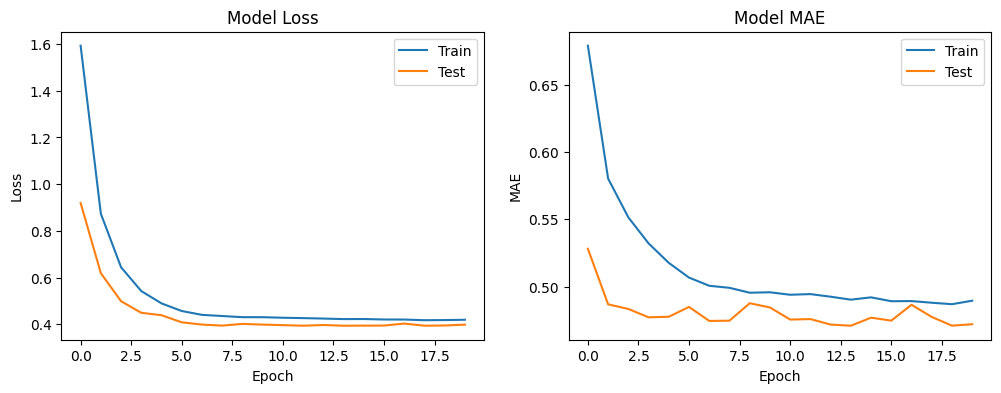

In [7]:
# Visualize the Training Process
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

-------------------
------------------
## **8.** **Evaluación del Modelo**
-------------------
------------------

In [8]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}, Model MAE: {mae}')

# Calculate the mean value of y_test
y_test_mean = np.mean(y_test)

# Convert the loss to a percentage of the mean value of y_test
loss_percentage = (loss / y_test_mean) * 100

# Convert the MAE to a percentage of the mean value of y_test
mae_percentage = (mae / y_test_mean) * 100

print(f'Model Loss: {loss} ({loss_percentage:.2f}%)')
print(f'Model MAE: {mae} ({mae_percentage:.2f}%)')

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3849 - mae: 0.4626
Model Loss: 0.3986192047595978, Model MAE: 0.47192445397377014
Model Loss: 0.3986192047595978 (12.67%)
Model MAE: 0.47192445397377014 (15.00%)


-------------------
------------------
## **9.** **Función de Recomendación Mejorada**
-------------------
------------------

In [9]:
def recommend_movies_embedding(emotion1, emotion2, movies=movies, mlb=mlb, model=model, top_n=10):
    emotions = [emotion1, emotion2]
    binarized_emotions = mlb.transform([emotions])
    predicted_rating = model.predict(binarized_emotions)[0][0]
    
    # Find movies with ratings close to the prediction
    movies['rating_diff'] = abs(movies['average_rating'] - predicted_rating)
    recommended_movies = movies.sort_values(by=['rating_diff', 'average_rating'], ascending=[True, False]).head(top_n)
    
    return recommended_movies[['title', 'average_rating']]

# Example recommendation
print("Recomendaciones para las emociones 'Joy' y 'Fear':")
print(recommend_movies_embedding('Joy', 'Fear'))

Recomendaciones para las emociones 'Joy' y 'Fear':


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
                                           title  average_rating
7049                 Cheaper by the Dozen (2003)        2.827455
5055                40 Days and 40 Nights (2002)        2.827500
19143                             Bel Ami (2012)        2.827586
3831                         Pajama Party (1964)        2.826923
25978  Justice League: Throne of Atlantis (2015)        2.826923
7816                    This Island Earth (1955)        2.828025
4498                      Family Business (1989)        2.826715
4944                  Conan the Destroyer (1984)        2.828308
10950                                 ATL (2006)        2.826531
5317                          Bad Company (2002)        2.828520
